In [2]:
%pylab inline

import pandas as pd
import pickle

tableau = pickle.load(open('tableau.colors', 'rb'))

rcParams['figure.figsize'] = (10,8)
rcParams['axes.grid'] = True
rcParams['lines.linewidth'] = 2.5
rcParams['axes.prop_cycle'] = cycler('color', tableau)

Populating the interactive namespace from numpy and matplotlib


In [15]:
df = pd.read_csv('../GDAX/Data/2016-10-08.trades.csv')
df.index = pd.to_datetime(df.t*1e9)
df.drop(['Unnamed: 0', 't'], axis=1, inplace=True)

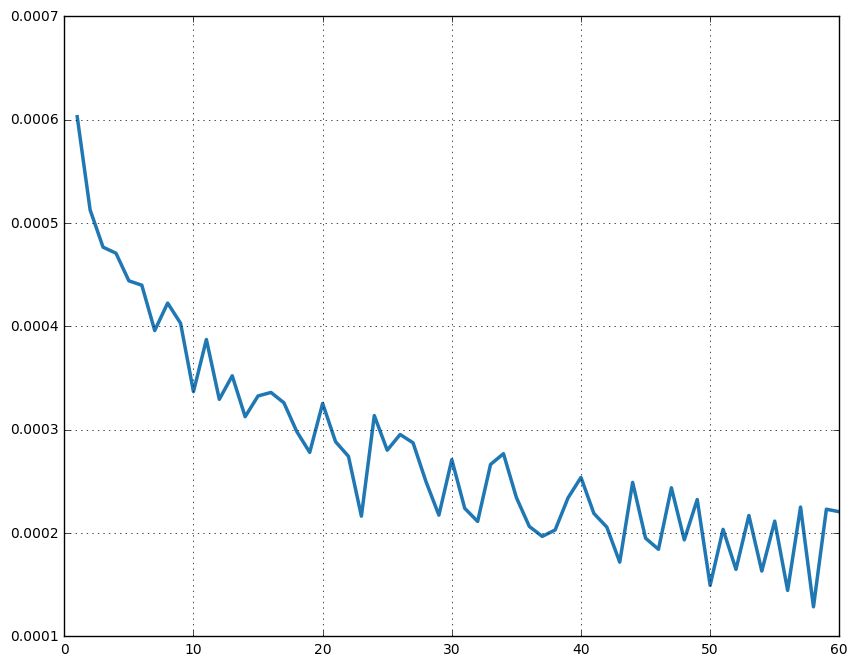

In [35]:
ns = range(1,61)
vols = list(map(lambda n: np.log(df.resample('%dT'%n).mean().px / \
                                 df.resample('%dT'%n).mean().px.shift(1)).std()*sqrt(60/n), ns))
plot(ns, vols)

In [39]:
df.iloc[-1].name - df.iloc[0].name

Timedelta('0 days 06:19:00')